# 🧠 Customer Churn Analysis – End-to-End Machine Learning Pipeline

This notebook presents a complete analysis of customer churn using a real-world telecom dataset. We will explore customer behavior and build predictive models to understand why customers leave.

## 🎯 Objectives:
1. Perform in-depth exploratory analysis of customer attributes.
2. Build and evaluate churn prediction models.
3. Interpret the model to derive actionable business insights.
4. Provide concrete recommendations to reduce churn.


## 1. Initial Setup
We begin by importing all the necessary Python libraries for:
- Data loading and preprocessing
- Visualization
- Machine learning modeling
- Model interpretation


In [1]:
# Import essential libraries for data analysis and modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# XGBoost classifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_auc_score, 
                             roc_curve, precision_recall_curve)

# SHAP for model interpretability
#import shap

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Inline plotting for Jupyter
%matplotlib inline


In [2]:
# Load the Telco Customer Churn dataset
df = pd.read_csv('Telco-Customer-Churn.csv')  

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
# Check data types
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Convert 'TotalCharges' to numeric 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(inplace=True)


In [6]:
# Display basic statistics for all columns (including categorical)
print("\nDescriptive statistics of the dataset:")
display(df.describe(include='all').T)



Descriptive statistics of the dataset:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7032,7032,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Univariate Analysis

We explore the distribution of each feature and its relationship to churn:
- First, we visualize the target variable `Churn`
     - Then, we analyze both categorical and numerical variables


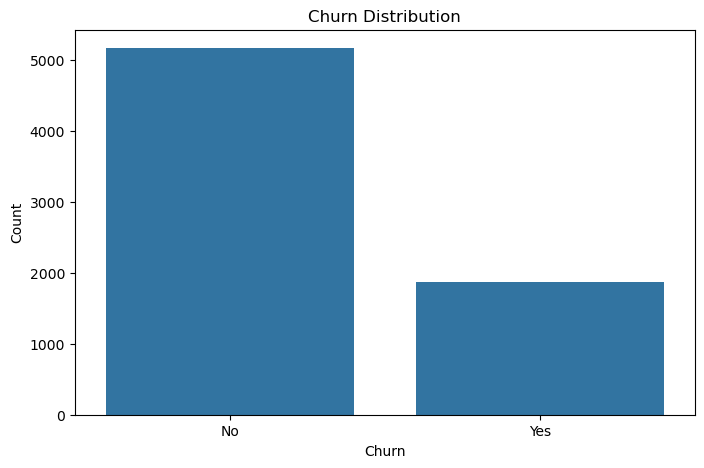

In [7]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


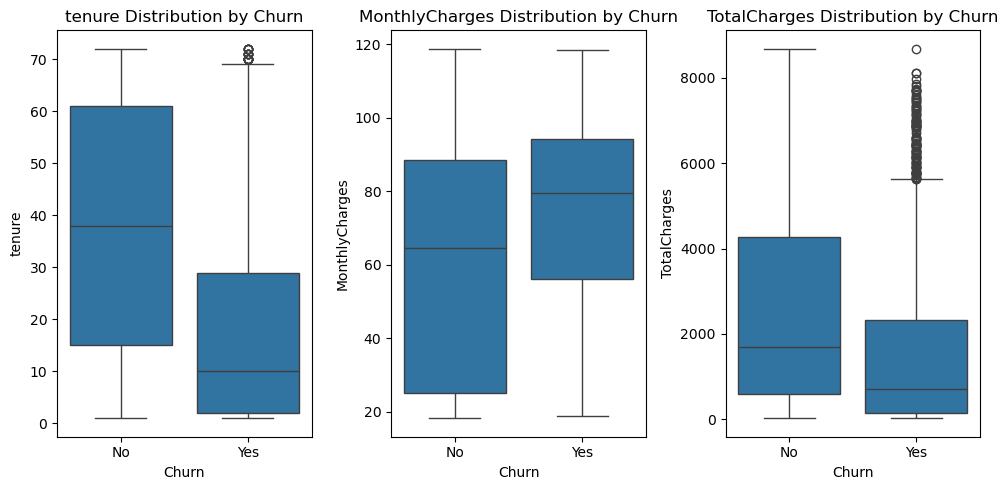

In [8]:
# Analyze numerical features vs churn
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(10, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} Distribution by Churn')
plt.tight_layout()
plt.show()


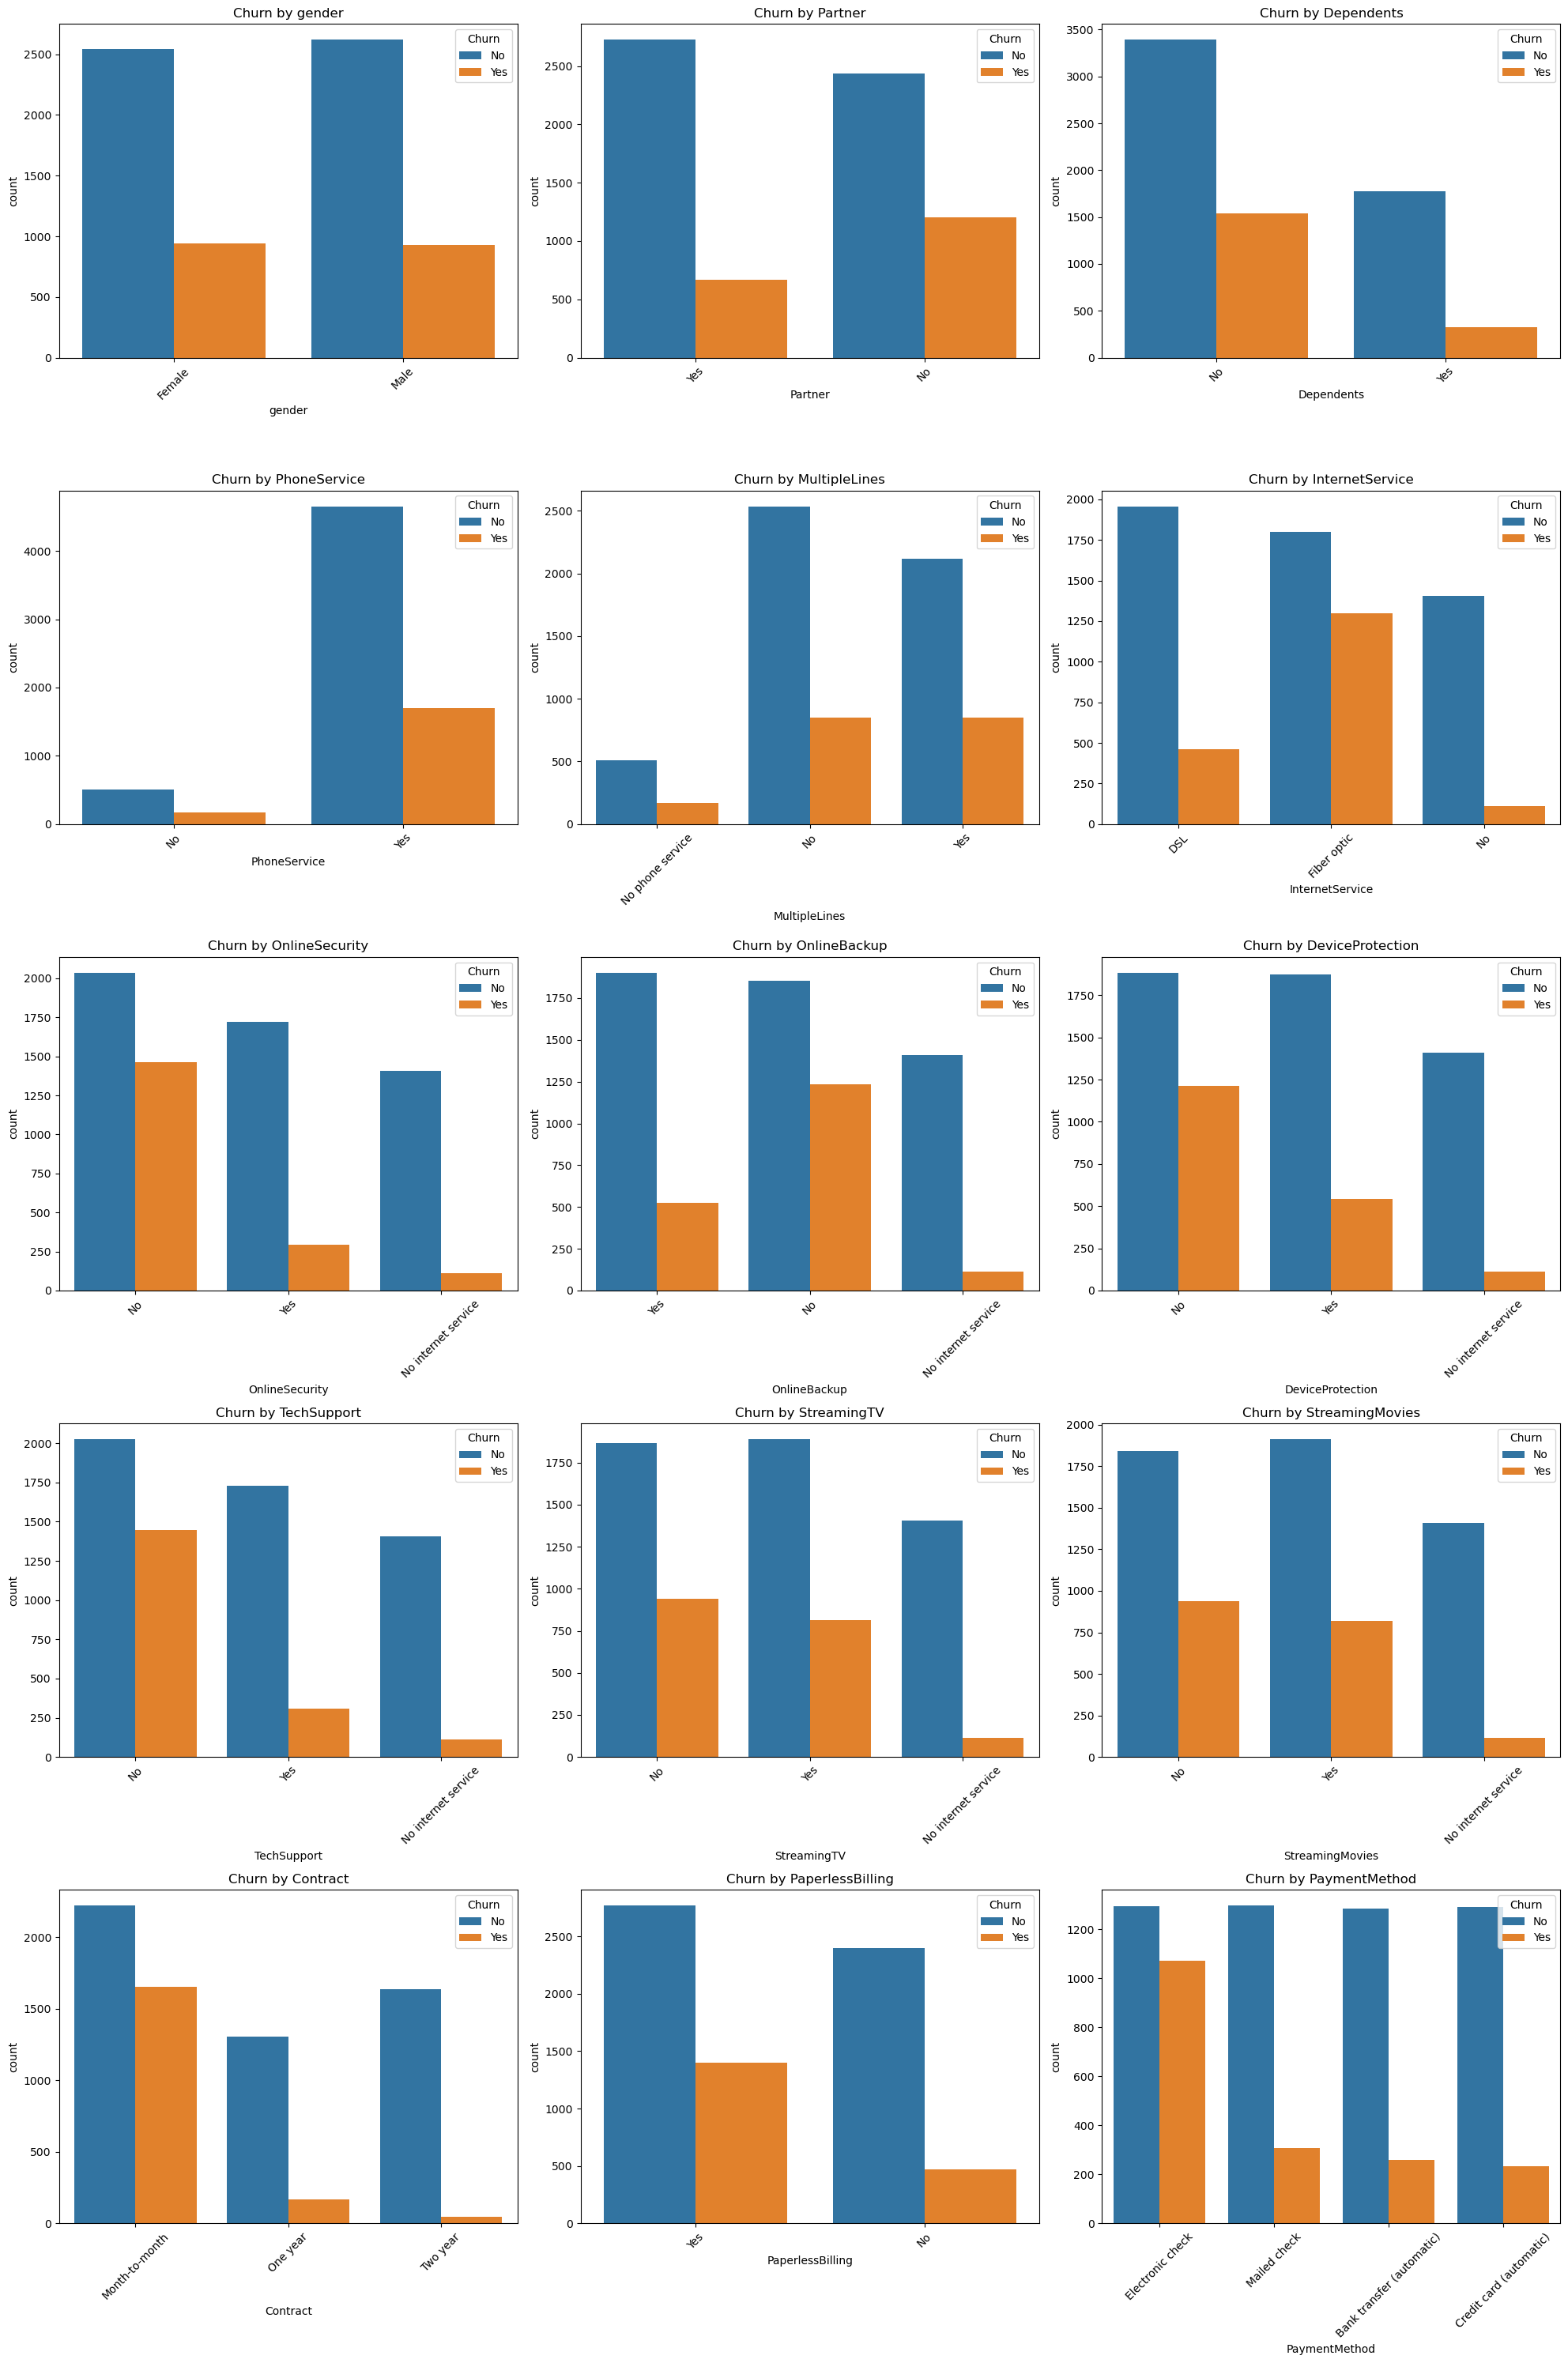

In [9]:
# Analyze categorical features vs churn
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 30))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Data Preprocessing

Before training our models, we need to:
- Drop irrelevant features (like `customerID`)
- Encode categorical variables (binary and multi-category)
- Split the data into training and testing sets


In [10]:
# Drop 'customerID' since it has no predictive value
df.drop('customerID', axis=1, inplace=True)

# Encode the target variable 'Churn' (Yes/No → 1/0)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

# Encode binary categorical features
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Encode multi-category features using one-hot encoding
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 
                                 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport',
                                 'StreamingTV', 'StreamingMovies',
                                 'Contract', 'PaymentMethod'], drop_first=True)


## 4. Train/Test Split

We now separate the data into features (`X`) and target (`y`), and split it into training and testing sets using an 80/20 ratio. Stratification ensures class balance in both sets.


In [11]:
# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [12]:
# Helper function to train, predict and evaluate a model
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n🚀 Model: {name}")
    print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")



🚀 Model: Logistic Regression
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1033
       Churn       0.65      0.58      0.61       374

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407

Accuracy: 0.8053

🚀 Model: Random Forest
              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1033
       Churn       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407

Accuracy: 0.7854

🚀 Model: XGBoost
              precision    recall  f1-score   support

    No Churn       0.84      0.86      0.85      1033
       Churn       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.7

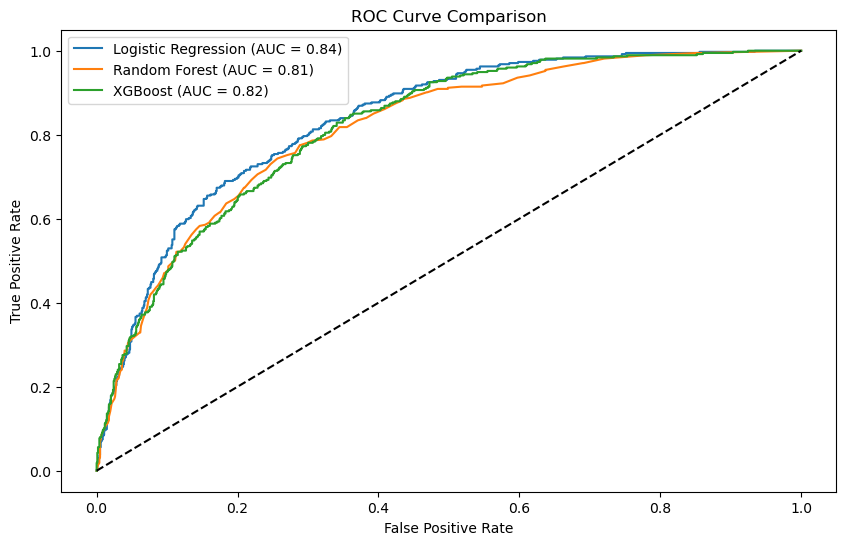

In [13]:
# Initialize models
logreg = LogisticRegression(max_iter=5000)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Evaluate all models
plt.figure(figsize=(10, 6))
evaluate_model(logreg, "Logistic Regression")
evaluate_model(rf, "Random Forest")
evaluate_model(xgb, "XGBoost")

# Diagonal reference line for ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


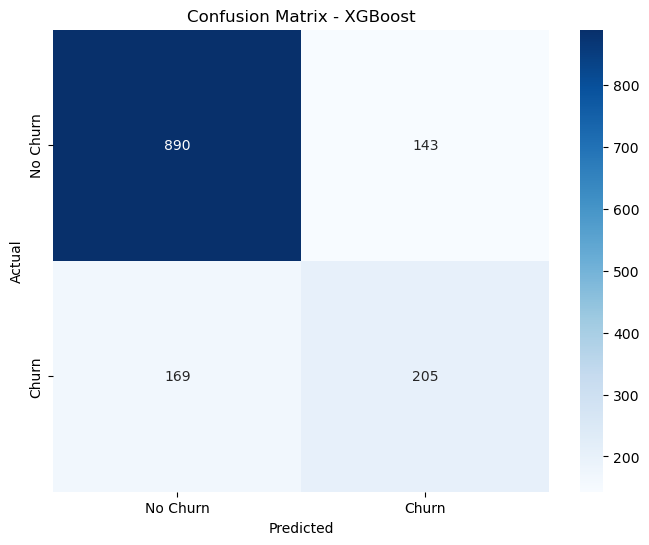

In [14]:
# Plot the confusion matrix for the last evaluated model (e.g., XGBoost)
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 7. Feature Importance

We analyze the most important features from the **Random Forest** model to identify the key drivers of churn.


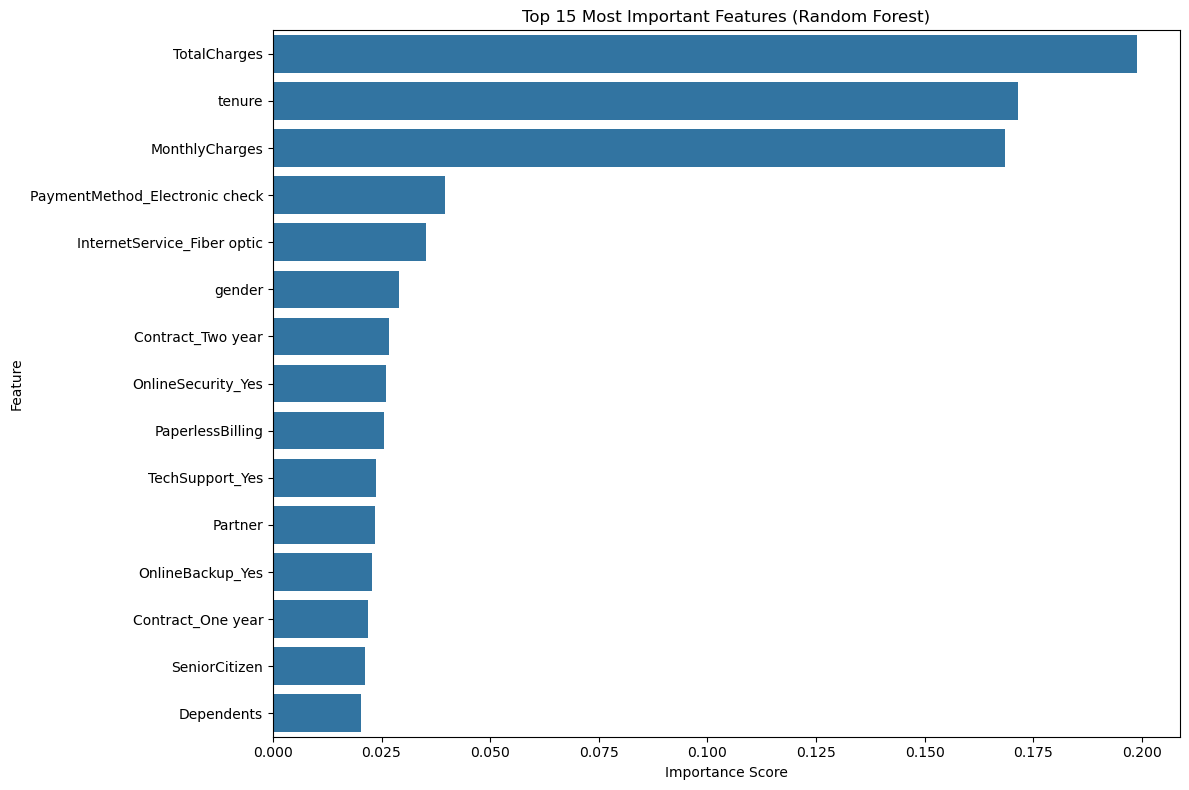

In [15]:
# Extract and sort feature importance from Random Forest
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp.head(15))
plt.title('Top 15 Most Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [16]:
print("📌 Actionable Insights and Recommendations:\n")

# 1. Contract type impact
contract_effect = df.groupby('Contract_One year')['Churn'].mean()
ratio = contract_effect.iloc[0] / contract_effect.iloc[1]
print(f"1. Customers on monthly contracts churn {ratio:.1f}x more than those on 1-year contracts.")
print("👉 Offer incentives for longer-term contracts.\n")

# 2. Technical support
techsupport_effect = df.groupby('TechSupport_Yes')['Churn'].mean()
ratio = techsupport_effect.iloc[0] / techsupport_effect.iloc[1]
print(f"2. Customers without technical support churn {ratio:.1f}x more often.")
print("👉 Include basic tech support in entry-level plans.\n")

# 3. Payment method
payment_effect = df.groupby('PaymentMethod_Electronic check')['Churn'].mean()
ratio = payment_effect.iloc[1] / payment_effect.iloc[0]
print(f"3. Customers using electronic checks churn {ratio:.1f}x more.")
print("👉 Encourage the use of auto-pay or credit card payments.\n")

# 4. Tenure analysis
tenure_effect = df.groupby(pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72]))['Churn'].mean()
print("4. Churn Rate by Customer Tenure:")
print(tenure_effect)
print("👉 Launch loyalty programs for new and short-tenure customers.\n")

# 5. Add-on services
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for service in services:
    col = f"{service}_Yes"
    if col in df.columns:
        effect = df.groupby(col)['Churn'].mean()
        ratio = effect[0] / effect[1]
        print(f"5. Customers with {service} churn {ratio:.1f}x less.")
        print(f"👉 Promote bundled services that include {service}.\n")


📌 Actionable Insights and Recommendations:

1. Customers on monthly contracts churn 2.7x more than those on 1-year contracts.
👉 Offer incentives for longer-term contracts.

2. Customers without technical support churn 2.1x more often.
👉 Include basic tech support in entry-level plans.

3. Customers using electronic checks churn 2.6x more.
👉 Encourage the use of auto-pay or credit card payments.

4. Churn Rate by Customer Tenure:
tenure
(0, 12]     0.476782
(12, 24]    0.287109
(24, 48]    0.203890
(48, 72]    0.095132
Name: Churn, dtype: float64
👉 Launch loyalty programs for new and short-tenure customers.

5. Customers with OnlineSecurity churn 2.1x less.
👉 Promote bundled services that include OnlineSecurity.

5. Customers with OnlineBackup churn 1.4x less.
👉 Promote bundled services that include OnlineBackup.

5. Customers with DeviceProtection churn 1.3x less.
👉 Promote bundled services that include DeviceProtection.

5. Customers with TechSupport churn 2.1x less.
👉 Promote bundled